### Import libraries

In [33]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score\

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Problem Statement

### 2. Data Gathering

In [54]:
df = pd.read_csv("bankloan.csv")
df.head()

ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### 3. EDA

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 4. Feature Engineering

#### Scaling

In [ ]:
df.drop(["ID", "ZIP.Code"], axis = 1, inplace = True)

### 4. Feature Selection

### 5. Model training

#### Train Test Split

In [46]:
x = df.drop('Personal.Loan', axis = 1)
y = df['Personal.Loan']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1, stratify= y)

# Logistic Regression

In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [48]:
# Training Data Evaluation
y_pred_train = log_reg.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3340   50]
 [ 137  223]]
**************************************************
Accuracy: 0.9501333333333334
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3390
           1       0.82      0.62      0.70       360

    accuracy                           0.95      3750
   macro avg       0.89      0.80      0.84      3750
weighted avg       0.95      0.95      0.95      3750



In [49]:
# Testing Data Evaluation
y_pred_test = log_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1109   21]
 [  50   70]]
**************************************************
Accuracy: 0.9432
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.77      0.58      0.66       120

    accuracy                           0.94      1250
   macro avg       0.86      0.78      0.82      1250
weighted avg       0.94      0.94      0.94      1250



# KNN Classfication

### Scaling

In [58]:
x = df.drop('Personal.Loan', axis = 1)
y = df['Personal.Loan']


In [59]:
std_scalar = StandardScaler()
array1 = std_scalar.fit_transform(x)
array1.shape

(5000, 11)

In [60]:
x = pd.DataFrame(array1, columns = x.columns)
x.head()

Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0 -1.774417   -1.666078 -0.538229  1.397414 -0.193385  -1.049078 -0.555524   
1 -0.029524   -0.096330 -0.864109  0.525991 -0.250611  -1.049078 -0.555524   
2 -0.552992   -0.445163 -1.363793 -1.216855 -0.536736  -1.049078 -0.555524   
3 -0.901970   -0.968413  0.569765 -1.216855  0.436091   0.141703 -0.555524   
4 -0.901970   -1.055621 -0.625130  1.397414 -0.536736   0.141703 -0.555524   

   Securities.Account  CD.Account    Online  CreditCard  
0            2.928915    -0.25354 -1.216618   -0.645314  
1            2.928915    -0.25354 -1.216618   -0.645314  
2           -0.341423    -0.25354 -1.216618   -0.645314  
3           -0.341423    -0.25354 -1.216618   -0.645314  
4           -0.341423    -0.25354 -1.216618    1.549632

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1, stratify= y)

In [73]:
knn_clf = KNeighborsClassifier(n_neighbors=6, p = 1)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [74]:
# Training Data Evaluation
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3387    3]
 [ 161  199]]
**************************************************
Accuracy: 0.9562666666666667
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3390
           1       0.99      0.55      0.71       360

    accuracy                           0.96      3750
   macro avg       0.97      0.78      0.84      3750
weighted avg       0.96      0.96      0.95      3750



In [75]:
# Testing Data Evaluation
y_pred_test = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1128    2]
 [  63   57]]
**************************************************
Accuracy: 0.948
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1130
           1       0.97      0.47      0.64       120

    accuracy                           0.95      1250
   macro avg       0.96      0.74      0.80      1250
weighted avg       0.95      0.95      0.94      1250



#### Best k Values 

Text(0, 0.5, 'Accuracy')

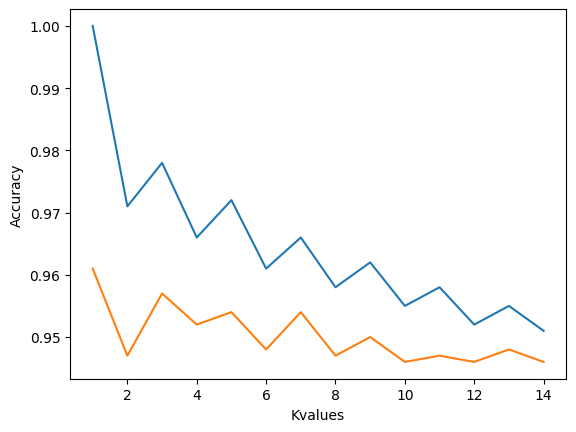

In [68]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 2)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

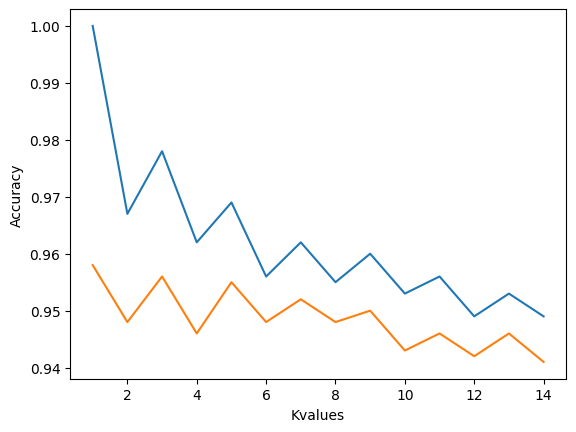

In [69]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors= k, p = 1)
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train), 3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test), 3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

# Decision Treee classification

In [76]:
dt_clf = DecisionTreeClassifier(random_state = 1)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [77]:
plt.figure(figsize=(100, 90))
tree = plot_tree(dt_clf, feature_names= x.columns, filled = True)
plt.savefig("DT_clf.png")

In [78]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3390    0]
 [   0  360]]
**************************************************
Accuracy: 1.0
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3390
           1       1.00      1.00      1.00       360

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [79]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1112   18]
 [  14  106]]
**************************************************
Accuracy: 0.9744
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1130
           1       0.85      0.88      0.87       120

    accuracy                           0.97      1250
   macro avg       0.92      0.93      0.93      1250
weighted avg       0.97      0.97      0.97      1250



### Hyper parameter tuning

In [80]:
dt_clf = DecisionTreeClassifier(random_state=1)

hyp_grid = { "criterion" :['gini','entropy'],
             "max_depth" : np.arange(5,10),
             "min_samples_split" : range(10,15),
             "min_samples_leaf" : range(3,8)}

gscv_dt_clf = GridSearchCV(dt_clf, param_grid= hyp_grid, cv = 3, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15)})

In [81]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=10, random_state=1)

In [82]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=10, random_state=1)

In [83]:
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.9872
Test Accuracy : 0.9848


# Random Forest Classification

In [84]:
rf_clf = RandomForestClassifier(n_estimators=30, criterion= "gini", random_state= 1)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=1)

In [85]:
# Training Data Evaluation
y_pred_train = rf_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[3390    0]
 [   1  359]]
**************************************************
Accuracy: 0.9997333333333334
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3390
           1       1.00      1.00      1.00       360

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [86]:
# Testing Data Evaluation
y_pred_test = rf_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", clf_report)

Confusion Matrix:
 [[1128    2]
 [  13  107]]
**************************************************
Accuracy: 0.988
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1130
           1       0.98      0.89      0.93       120

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



# Adaboost

In [87]:
adb_clf = AdaBoostClassifier(random_state=10,
                            n_estimators=70,
                            learning_rate=1.0)
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=70, random_state=10)

In [88]:
# Training Data Evaluation
y_pred_train = adb_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :', accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[3362   28]
 [  64  296]]
Accuracy : 0.9754666666666667
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3390
           1       0.91      0.82      0.87       360

    accuracy                           0.98      3750
   macro avg       0.95      0.91      0.93      3750
weighted avg       0.97      0.98      0.97      3750



In [89]:
# Testing Data Evaluation
y_pred = adb_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[1118   12]
 [  22   98]]
Accuracy : 0.9728
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1130
           1       0.89      0.82      0.85       120

    accuracy                           0.97      1250
   macro avg       0.94      0.90      0.92      1250
weighted avg       0.97      0.97      0.97      1250

